In [1]:
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [4]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [5]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [69]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


## Preliminary Visualizations

First, plot simple histogram and bar graphs to show distributions within data

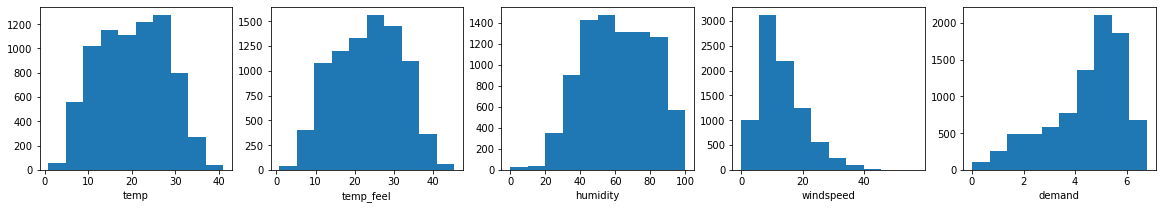

In [40]:
# Plot histograms of each numerical column, including the dependent variable (demand)
numerical_cols = ['temp', 'temp_feel', 'humidity', 'windspeed', 'demand']

fig, ax = plt.subplots(1, len(numerical_cols), figsize=(20, 3))
for i, col in enumerate(numerical_cols):
    ax[i].hist(data[col])
    ax[i].set_xlabel(col)


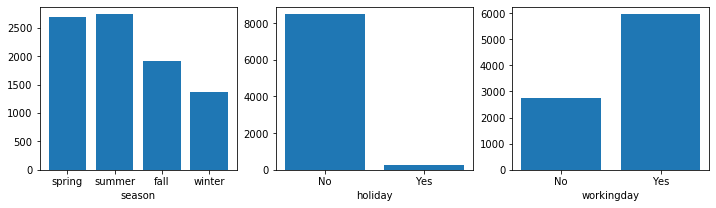

In [39]:
# Plot bar graphs of categorical distributions
categorical_cols = ['season', 'holiday', 'workingday']
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(12, 3))
for i, col in enumerate(categorical_cols):
    vals = data[col].unique()
    counts = [ len(data[data[col] == vals[i]]) for i in range(len(vals)) ]
    ax[i].bar(np.arange(len(vals)), counts)
    ax[i].set_xticks(np.arange(len(vals)))
    ax[i].set_xticklabels(vals)
    ax[i].set_xlabel(col)



Next, attempt to observe any clear visual correlations with dependent variable numerical and categorical data via scatter and bar plots

Text(0, 0.5, 'demand')

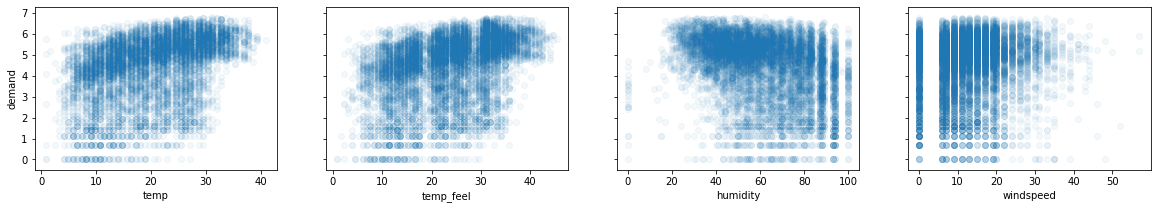

In [96]:
# Plot histograms of each numerical column, including the dependent variable (demand)
numerical_cols = ['temp', 'temp_feel', 'humidity', 'windspeed']

fig, ax = plt.subplots(1, len(numerical_cols), figsize=(20, 3), sharey=True)
for i, col in enumerate(numerical_cols):
    ax[i].scatter(data[col], data['demand'], alpha=0.05)
    ax[i].set_xlabel(col)

ax[0].set_ylabel('demand')


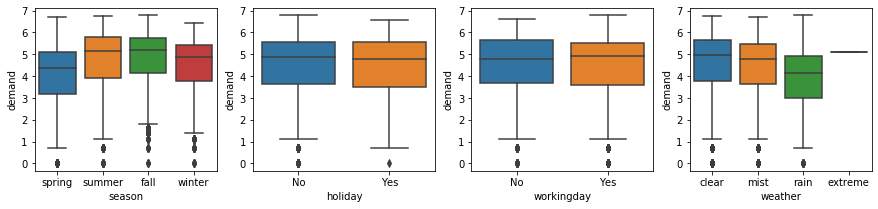

In [219]:
# Plot bar graphs of categorical distributions
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

weather_abbreviations = {
    'Clear or partly cloudy': 'clear',
    'Mist': 'mist',
    'Light snow or rain': 'rain',
    'heavy rain/ice pellets/snow + fog': 'extreme'
}
for weather in weather_abbreviations:
    data.loc[data['weather'] == weather, 'weather'] = weather_abbreviations[weather]
# Add a column for better xlabels

fig, ax = plt.subplots(1, len(categorical_cols), figsize=(15, 3))
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='demand', data=data, ax=ax[i])

To visualize timestamp data, we split the timestamp into the day of the week, the month, and the year.

In [120]:
# Add dayofweek, month, and year to data

timestamp_index = pd.DatetimeIndex(data['timestamp'])
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    data.loc[timestamp_index.month == i+1, 'month'] = month
    
years = timestamp_index.year.unique()
for year in years:
    data.loc[timestamp_index.year == year, 'year'] = year
    
# Note that dayofweek has 0 as monday, 6 as sunday
daysofweek = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
for i, day in enumerate(daysofweek):
    data.loc[timestamp_index.dayofweek == i, 'day'] = day
    
hours = np.arange(24)
for hour in hours:
    data.loc[timestamp_index.hour == hour, 'hour'] = hour

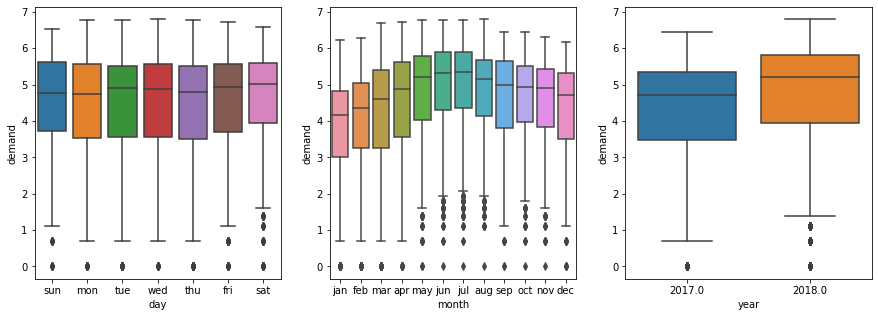

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
time_types = ['day', 'month', 'year']
for i, time_type in enumerate(time_types):
    sns.boxplot(x=time_type, y='demand', data=data, ax=ax[i])

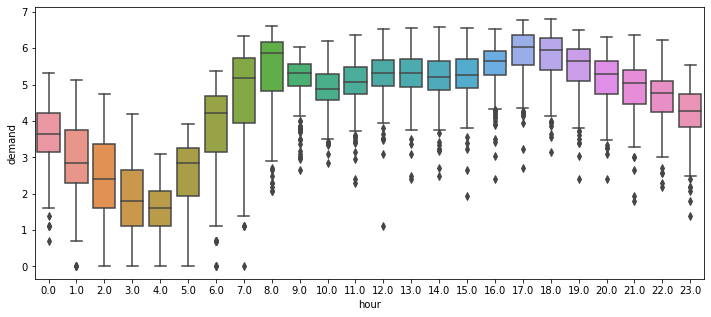

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(x='hour', y='demand', data=data, ax=ax)

From this visualization, a few visual correlations can be seen
* Demand appears to have minimal positive correlation with temperature
* Demand has clearer negative correlation with humidity, and positive correlation with windspeed
* Demand increases in summer and fall seasons, and is lowest in spring seasons. This correlates with month correlations that are seen, with demand gradually increases from the start of the year until june and july, and falling back off
* Demand is slightly increased on weekends
* Demand was increased in 2018 (perhaps due to the service becoming more popular)
* Demand has strong dependence on the time of the day, with demand largest before and after standard working hours (7-8am, 5-6pm), and lowest during standard sleeping hours (10pm-4am)

Based on the plots below, it also appears that temp may be strongly correlated with temp_feel, and workingday may include holiday information. In addition, there are simply not that many non-holidays. 

Season information is encoded within the month information, and seems to provide less rich information.

**We will opt to remove 'temp_feel', 'holiday', 'season', columns from the data**

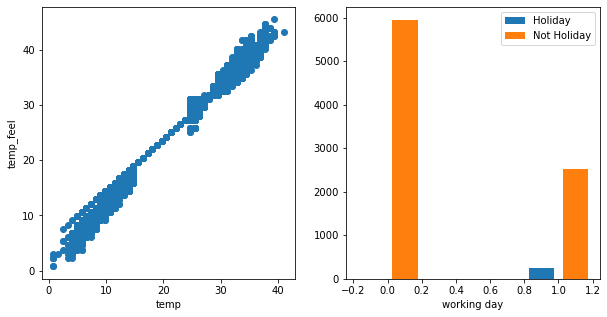

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data['temp'], data['temp_feel'])
ax[0].set_xlabel('temp')
ax[0].set_ylabel('temp_feel')

d = data[data['workingday'] == 'Yes']
values = ['Yes', 'No']
counts = []
for value in values:
    counts.append(np.sum(d['holiday'] == value))
    
d = data[data['workingday'] == 'No']
values = ['Yes', 'No']
for value in values:
    counts.append(np.sum(d['holiday'] == value))
    
ax[1].bar([-0.1, 0.9], [counts[0], counts[2]], width=0.15, label='Holiday')
ax[1].bar([0.1, 1.1], [counts[1], counts[3]], width=0.15, label='Not Holiday')
ax[1].set_xticks([0, 1], ['Yes', 'No'])
ax[1].set_xlabel('working day')
ax[1].legend()

### Preliminary Visualizations Summary

* Temperature, humidity, and windspeed all seem to provide useful information, as well as the categorical variable of weather
* Workingday may provide useful information
* Various time related categories seem to have a large influence on bike rental demand, so we will turn year, month, dayofweek, into additional categorical features
* We will also remove 'temp_feel', 'holiday', 'season', and 'timestamp' (after extracting time categorical features) due to information already being stored within other variables

## Model Creation

In this section, we perform the following in order of each subsequent code block
1. Preprocess the data by 
    1. Filling NaN values with relevant values (e.g., temp replaced with temp_feel. Windspeed, humidity, and remaining temp values replaced with median or mean)
    2. Pull hour, day, month, year from timestamp data
    3. Turn categorical data into one-hot encodings (hour, day, month, year, workingday, weather)
    4. Drop columns that have repeated information (holiday, season, timestamp, temp_feel)
    5. Drop remaining NaN values (there are no more NaN values, but include this step as a precaution in case new data has unforseen missing parts)
2. Split train data into training and validation sets
3. Perform grid search to tune hyperparmeters for DecisionTreeRegressor and RandomForestRegressor
4. Compare MAE scores on the withheld validation set for LinearRegressor, RidgeRegressor, and DecisionTreeRegressor/RandomForestRegressor with tuned hyperparameters

From the 4 models trained, the DecisionTreeRegressor performs the best on the validation set, so we will finalize analysis with this model

In [336]:
# Data Preprocessing
# Reload clean dataset
data = pd.read_csv('train.csv')

def preprocess_data(data):
    # Add dayofweek, month, year, hour to data
    timestamp_index = pd.DatetimeIndex(data['timestamp'])
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    for i, month in enumerate(months):
        data.loc[timestamp_index.month == i+1, 'month'] = month

    years = timestamp_index.year.unique()
    for year in years:
        data.loc[timestamp_index.year == year, 'year'] = year

    # Note that dayofweek has 0 as monday, 6 as sunday
    daysofweek = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for i, day in enumerate(daysofweek):
        data.loc[timestamp_index.dayofweek == i, 'day'] = day

    hours = np.arange(24)
    for hour in hours:
        data.loc[timestamp_index.hour == hour, 'hour'] = hour


    # where temp is na, use tempfeel since they are correlated strongly
    data.loc[data['temp'].isna(), 'temp'] = data[data['temp'].isna()]['temp_feel']

    # where humidity or windspeed is na, use median, since distributions are slightly skewed
    data['humidity'].fillna(value=data['humidity'].median(), inplace=True)
    data['windspeed'].fillna(value=data['windspeed'].median(), inplace=True)
    # to fill remaining na temp values, use mean since distribution is balanced
    # (these rows had no temp or temp_feel)
    data['temp'].fillna(value=data['temp'].median(), inplace=True)


    # remove id, holiday, timestamp, and season columns
    data.drop(['temp_feel', 'id', 'timestamp', 'season', 'holiday'], axis=1, inplace=True)

    # turn categorical features into one-hot encodings
    data = pd.get_dummies(data, columns=['month', 'year', 'day', 'hour', 'weather', 'workingday'])
    
    # finally drop any remaining na rows, incase of special outliers in test data
    data.dropna(inplace=True)
    return data

data = preprocess_data(data)

In [294]:
# Create model using sklearn LinearRegressor, RidgeRegressor, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# Split train data into training and validation
y = data['demand']
x = data.drop('demand', axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

In [282]:
# Perform gridsearch to find good hyperparmeters for trees and forests
tree = DecisionTreeRegressor(random_state=0)
params = {
    'max_depth': np.arange(1, 50, 2), 
    'min_samples_leaf': np.arange(2, 15)
}
gs_tree = GridSearchCV(tree, params, cv=3)
gs_tree.fit(x_train, y_train)
tree_params = gs_tree.best_params_

forest = RandomForestRegressor(random_state=0)
params = {
    'n_estimators': np.arange(25, 150, 25), 
    'max_depth': np.arange(1, 11, 2),
    'min_samples_leaf': np.arange(2, 15, 3)
}
gs_forest = GridSearchCV(forest, params, cv=3)
gs_forest.fit(x_train, y_train)
forest_params = gs_forest.best_params_

In [296]:
models = [LinearRegression, Ridge, DecisionTreeRegressor, RandomForestRegressor]
model_names = ['Linear Regressor', 'Ridge Regressor', 'Decision Tree', 'Random Forest']
params = [{}, {}, tree_params, forest_params]
valid_scores = []

for i, model in enumerate(models):
    param = params[i]
    regressor = model(**param)
    
    regressor.fit(x_train, y_train)
    
    y_pred = regressor.predict(x_valid)
    score = mean_absolute_error(y_pred, y_valid)
    valid_scores.append(score)
    
    print(f'{model_names[i]} attained a validation mean absolute error of {score}')


Linear Regressor attained a validation mean absolute error of 0.4672957790254968
Ridge Regressor attained a validation mean absolute error of 0.46759049528608637
Decision Tree attained a validation mean absolute error of 0.35156625356366017
Random Forest attained a validation mean absolute error of 0.4995404484670732


## Feature Importances

After visualizing the top features used by the DecisionTreeRegressor, we indeed see that as seen from the feature importance visualizations (only visualizing top 20 most important features), the time of day is important. Temperature and humidity also have strong effects on bike rental demand.

Text(0.5, 0, 'relative feature importance')

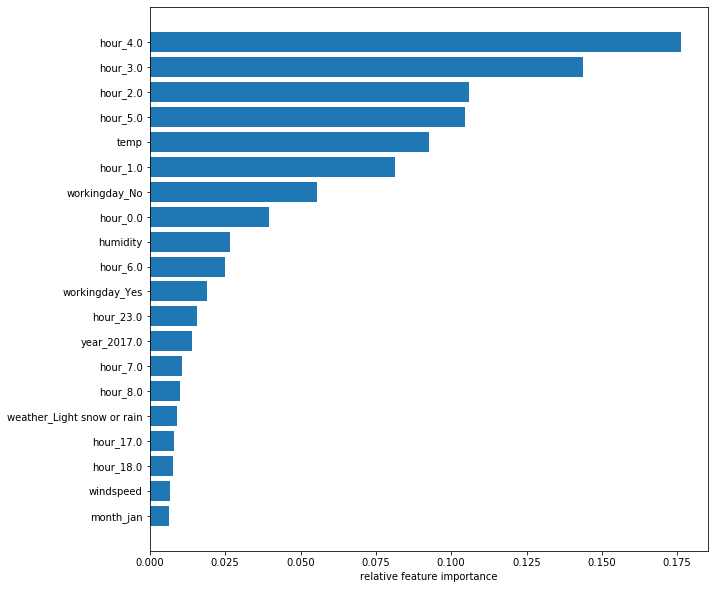

In [323]:
# Use DecisionTreeRegressor and train on all data now
regressor = DecisionTreeRegressor(**tree_params, random_state=0)
regressor.fit(x, y)

# Visualize the top 20 features
num_top_features = 20

plt.figure(figsize=(10, 10))

features = x.columns
importances = regressor.feature_importances_
features = pd.DataFrame({'features': features, 'importances': importances})

plot_features = features.sort_values('importances', ascending=False).head(num_top_features)
plt.barh(num_top_features - np.arange(num_top_features), plot_features['importances'])
plt.yticks(num_top_features - np.arange(num_top_features), plot_features['features'])

plt.xlabel('relative feature importance')

## Final Predictions

Finally use our model to predict the demand for test data (note that we use the preprocesing function from earlier, but we need to add missing columns for categorical features that are never seen in the test data and reorganize the columns to fit the same order as the model was tested on)

In [349]:
test_data = pd.read_csv('test.csv')
test_data = preprocess_data(test_data)

# Add missing categorical one-hot columns and set values to 0
for column in x.columns:
    if column not in test_data.columns:
        test_data[column] = 0
        
# Sort columns in the same way that data is sorted
test_data = test_data[x.columns]
demand_pred = regressor.predict(test_data)

In [ ]:
submission_df = pd.DataFrame({'id': test_data.index, 'demand': demand_pred})

#Submission
submission_df.to_csv('submissions.csv',index=False)

---